In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("House Prices Dataset.csv")

In [4]:
data.head(5)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,8,2,548,208500
1,6,1262,1262,1262,2,6,2,460,181500
2,7,920,920,1786,2,6,2,608,223500
3,7,756,961,1717,1,7,3,642,140000
4,8,1145,1145,2198,2,9,3,836,250000


In [5]:
data.isnull().sum()

OverallQual     0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

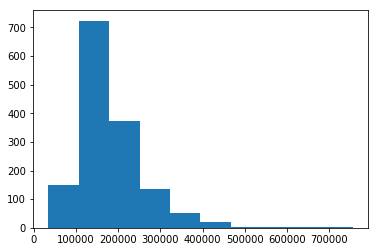

In [6]:
plt.hist(data['SalePrice'])

SalePrice seems skew to right. Hence, I adjust it by log function.

In [7]:
data['log_SalePrice'] = np.log(data['SalePrice'])

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

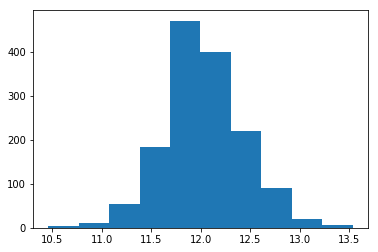

In [8]:
plt.hist(data['log_SalePrice'])

In [9]:
data.head(5)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,log_SalePrice
0,7,856,856,1710,2,8,2,548,208500,12.247694
1,6,1262,1262,1262,2,6,2,460,181500,12.109011
2,7,920,920,1786,2,6,2,608,223500,12.317167
3,7,756,961,1717,1,7,3,642,140000,11.849398
4,8,1145,1145,2198,2,9,3,836,250000,12.429216


In [10]:
#select x and y
coll = [8,9]
#drop price and logprice
X = data.drop(data.columns[coll], axis = 1)
Y = pd.DataFrame(data['log_SalePrice'], columns = ['log_SalePrice'])
names = data.drop(data.columns[coll], axis = 1).columns

1.	Fit the full model (called model A), what is your fitted model? 

In [11]:
from sklearn import linear_model
import statsmodels.api as sm

In [12]:
regr = linear_model.LinearRegression()
regr = regr.fit(X, Y)

In [13]:
print(regr.intercept_,regr.coef_)

[10.55929929] [[1.25495220e-01 1.20948129e-04 3.57482463e-05 1.70005258e-04
  4.10786552e-02 5.29306118e-04 1.00058662e-01 5.84953398e-05]]


In [14]:
cutdata = sm.add_constant(data)
model = sm.OLS(Y,X).fit()
model.summary()

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          log_SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              7957.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:40:27   Log-Likelihood:                         -2927.1
No. Observations:                1460   AIC:                                      5870.
Df Residuals:                    1452   BIC:                                      5913.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      1.2578      0.042     29.849      0.000       1.175       1.340
TotalBsmtSF     -0.0009      0.000     -4.658      0.000      -0.001      -0.001
1stFlrSF         0.0023      0.000     10.390      0.000       0.002       0.003
GrLivArea       -0.0032      0.000    -18.457      0.000      -0.004      -0.003
FullBath         0.0816      0.118      0.692      0.489      -0.150       0.313
TotRmsAbvGrd     1.1498      0.043     26.510      0.000       1.065       1.235
GarageCars      -0.3247      0.142     -2.285      0.022      -0.603      -0.046
GarageArea       0.0003      0.000      0.632      0.527      -0.001       0.001
==============================================================================
Omnibus:                       24.251   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.143
Skew:                          -0.262   Prob(JB):                     1.28e-06
Kurtosis:                       3.413   Cond. No.                     7.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
scaler = StandardScaler()
X_col = X.columns
std_X = scaler.fit_transform(X)
std_Y = scaler.fit_transform(Y)
std_df = pd.DataFrame(std_Y, columns = ['log_SalePrice'] )
std_df.head()
std_df.describe()

,log_SalePrice
count,1.460000e+03
mean,-1.907759e-15
std,1.000343e+00
min,-3.916228e+00
25%,-6.234515e-01
50%,-5.646023e-02
75%,6.252717e-01
max,3.782532e+00


In [16]:
model = sm.OLS(std_Y, std_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              710.0
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:42:50   Log-Likelihood:                         -909.71
No. Observations:                1460   AIC:                                      1835.
Df Residuals:                    1452   BIC:                                      1878.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4345      0.018     24.230      0.000       0.399       0.470
x2             0.1328      0.022      5.991      0.000       0.089       0.176
x3             0.0346      0.023      1.527      0.127      -0.010       0.079
x4             0.2236      0.026      8.638      0.000       0.173       0.274
x5             0.0567      0.016      3.474      0.001       0.025       0.089
x6             0.0022      0.022      0.100      0.921      -0.040       0.045
x7             0.1872      0.027      7.000      0.000       0.135       0.240
x8             0.0313      0.026      1.191      0.234      -0.020       0.083
==============================================================================
Omnibus:                      810.025   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17598.125
Skew:                          -2.122   Prob(JB):                         0.00
Kurtosis:                      19.470   Cond. No.                         6.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.	With the following values: 

OverallQual: 6

TotalBsmtSF: 1262

1stFlrSF: 1262

GrLivArea: 1262

FullBath: 2

TotRmsAbvGrd: 6

GarageCars: 2

GarageArea: 460

What is your predicted house price using model A?

In [17]:
Predict_House_Price = regr.intercept_+ np.dot(regr.coef_,[6, 1262, 1262, 1262, 2, 6, 2, 460])
print(Predict_House_Price)

[12.0369264]


3.	Use forward selection to construct a model B. 

In [18]:
# from the source code in stepwise_regression package

def forward_regression(X, y, threshold_in, verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            if (len(included) == 0):
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            else:
                model = sm.OLS(y, pd.DataFrame(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break
    return included

def backward_regression(X, y, threshold_out, verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        if (len(included) == 1):
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        else:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

3. forward selection, model B

In [19]:
listB = forward_regression(X,  y=Y, threshold_in = 0.05, verbose=True)

Add  OverallQual                    with p-value 0.0
Add  TotRmsAbvGrd                   with p-value 5.91699e-89
Add  GrLivArea                      with p-value 4.09753e-57
Add  1stFlrSF                       with p-value 4.9338e-23
Add  TotalBsmtSF                    with p-value 2.05467e-06
Add  GarageCars                     with p-value 0.0026312


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
data_B = data[['OverallQual',
 'TotRmsAbvGrd',
 'GrLivArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageCars']]

In [21]:
model = sm.OLS(Y,data_B).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          log_SalePrice   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.062e+04
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:43:18   Log-Likelihood:                         -2927.5
No. Observations:                1460   AIC:                                      5867.
Df Residuals:                    1454   BIC:                                      5899.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      1.2650      0.041     31.213      0.000       1.185       1.344
TotRmsAbvGrd     1.1516      0.043     26.920      0.000       1.068       1.236
GrLivArea       -0.0032      0.000    -18.840      0.000      -0.004      -0.003
1stFlrSF         0.0024      0.000     10.480      0.000       0.002       0.003
TotalBsmtSF     -0.0009      0.000     -4.666      0.000      -0.001      -0.001
GarageCars      -0.2432      0.081     -3.013      0.003      -0.402      -0.085
==============================================================================
Omnibus:                       25.024   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.209
Skew:                          -0.265   Prob(JB):                     7.49e-07
Kurtosis:                       3.427   Cond. No.                     4.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
std_data_B = scaler.fit_transform(data_B)
model = sm.OLS(std_Y,std_data_B).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              937.6
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:44:22   Log-Likelihood:                         -916.12
No. Observations:                1460   AIC:                                      1844.
Df Residuals:                    1454   BIC:                                      1876.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4474      0.018     25.473      0.000       0.413       0.482
x2             0.0085      0.021      0.397      0.692      -0.034       0.051
x3             0.2444      0.025      9.654      0.000       0.195       0.294
x4             0.0376      0.023      1.656      0.098      -0.007       0.082
x5             0.1310      0.022      5.916      0.000       0.088       0.174
x6             0.2212      0.015     14.442      0.000       0.191       0.251
==============================================================================
Omnibus:                      821.026   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18234.894
Skew:                          -2.156   Prob(JB):                         0.00
Kurtosis:                      19.768   Cond. No.                         5.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. backward selection, model C

In [23]:
backward_regression(X , y = Y, threshold_out = 0.05, verbose=True)

Drop TotRmsAbvGrd                   with p-value 0.920588
Drop GarageArea                     with p-value 0.235472
Drop 1stFlrSF                       with p-value 0.107945


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars']

In [24]:
data_C = data.drop(columns=['TotRmsAbvGrd', 'GarageArea', '1stFlrSF', 'SalePrice', 'log_SalePrice'])

In [25]:
model = sm.OLS(Y,data_C).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          log_SalePrice   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              7560.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:44:35   Log-Likelihood:                         -3297.9
No. Observations:                1460   AIC:                                      6606.
Df Residuals:                    1455   BIC:                                      6632.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual     1.6839      0.051     33.078      0.000       1.584       1.784
TotalBsmtSF     0.0002      0.000      1.467      0.143   -8.39e-05       0.001
GrLivArea       0.0004      0.000      2.338      0.020     6.2e-05       0.001
FullBath        0.6098      0.149      4.081      0.000       0.317       0.903
GarageCars     -0.3121      0.105     -2.975      0.003      -0.518      -0.106
==============================================================================
Omnibus:                       16.184   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.534
Skew:                          -0.241   Prob(JB):                     0.000257
Kurtosis:                       3.201   Cond. No.                     4.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
std_data_C = scaler.fit_transform(data_C)
model = sm.OLS(std_Y,std_data_C).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              1134.
Date:                Mon, 04 Nov 2019   Prob (F-statistic):                        0.00
Time:                        18:45:05   Log-Likelihood:                         -911.72
No. Observations:                1460   AIC:                                      1833.
Df Residuals:                    1455   BIC:                                      1860.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4299      0.018     24.382      0.000       0.395       0.464
x2             0.1616      0.015     11.129      0.000       0.133       0.190
x3             0.2370      0.017     14.047      0.000       0.204       0.270
x4             0.0552      0.016      3.424      0.001       0.024       0.087
x5             0.2155      0.015     14.017      0.000       0.185       0.246
==============================================================================
Omnibus:                      802.230   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16921.535
Skew:                          -2.103   Prob(JB):                         0.00
Kurtosis:                      19.139   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5.	Use Ridge regression to construct model D.

In [27]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(std_X, std_Y)
alpha2 = ridgecv.alpha_  
print('Best alpha with Ridge cross validation is ' + str(alpha2))

Best alpha with Ridge cross validation is 10.0


In [28]:
names = ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10.0)
ridge.fit(std_X, std_Y)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
ridge.coef_

array([[0.43074219, 0.13232178, 0.03629124, 0.21905623, 0.0586566 ,
        0.00560342, 0.18333538, 0.03616896]])

In [31]:
ridge_coe = pd.DataFrame(ridge.coef_[0], index = names)
ridge_coe.columns = ['Coefficient']
ridge_coe.head(9)

,Coefficient
OverallQual,0.430742
TotalBsmtSF,0.132322
1stFlrSF,0.036291
GrLivArea,0.219056
FullBath,0.058657
TotRmsAbvGrd,0.005603
GarageCars,0.183335
GarageArea,0.036169


In [32]:
ridge.score(std_X, std_Y)

0.7963997246672627

## AIC = 2k + n ln(RSS/n) 

In [33]:
y_hat = ridge.predict(std_X)
resid = std_Y - y_hat
n = len(resid)
k = len(names)
RSS = (resid**2).sum()

In [34]:
AIC= 2*k + n*np.log(RSS/n)

In [35]:
AIC.tolist()

-2307.7310972977953

## BIC = 2k*ln(n) + n ln(RSS/n) 

In [36]:
BIC= 2*k*np.log(n) + n*np.log(RSS/n)

In [37]:
BIC.tolist()

-2207.1520298625574

6.	Use Lasso regression to construct model E

In [38]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(std_X, std_Y)
alpha = lassocv.alpha_
print('Best alpha with Lasso cross validation is ' + str(alpha))

Best alpha with Lasso cross validation is 0.013318069871468486


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.013318069871468486)
L1 = lasso.fit(std_X, std_Y)

In [40]:
lasso.coef_

array([0.43276339, 0.1275249 , 0.03256074, 0.22303389, 0.05078099,
       0.        , 0.18498231, 0.02789313])

In [41]:
lasso_coe = pd.DataFrame(lasso.coef_, index = names)
lasso_coe.columns = ['Coefficient']
lasso_coe.head(9)

,Coefficient
OverallQual,0.432763
TotalBsmtSF,0.127525
1stFlrSF,0.032561
GrLivArea,0.223034
FullBath,0.050781
TotRmsAbvGrd,0.000000
GarageCars,0.184982
GarageArea,0.027893


In [42]:
lasso.score(std_X, std_Y)

0.7961146315293581

According to the above table, it can be seen that one feature has a coefficient of 0.  

A coefficient of 0 means that it is a less important variable.

Hence, TotRmsAbvGrd is a less important variable.

In [43]:
y_hat = lasso.predict(std_X)
resid = std_Y - y_hat
n = len(resid)
k = len(names)
RSS = (resid**2).sum()

In [44]:
AIC= 2*k + n*np.log(RSS/n)
AIC.tolist()

11485.295619649329

In [45]:
BIC= 2*k*np.log(n) + n*np.log(RSS/n)
BIC.tolist()

11585.874687084566

7.	Report the AIC, BIC of models A, B, C, D, E. Which models you preferred? Why?

There are lots of critirias to value models. I pick three of them, AIC, BIC and R^2, to assess the above five models.

According to the previous tables of the five models, models A and B have max R square.

However, model D, Lasso regression, has the minimum value of AIC and BIC.

AIC and BIC consider both complexity and goodness of fit. These two critiria are more appropriate for model appraisal.

Therefore, I believe that the ridge regression model is the best of those five models.